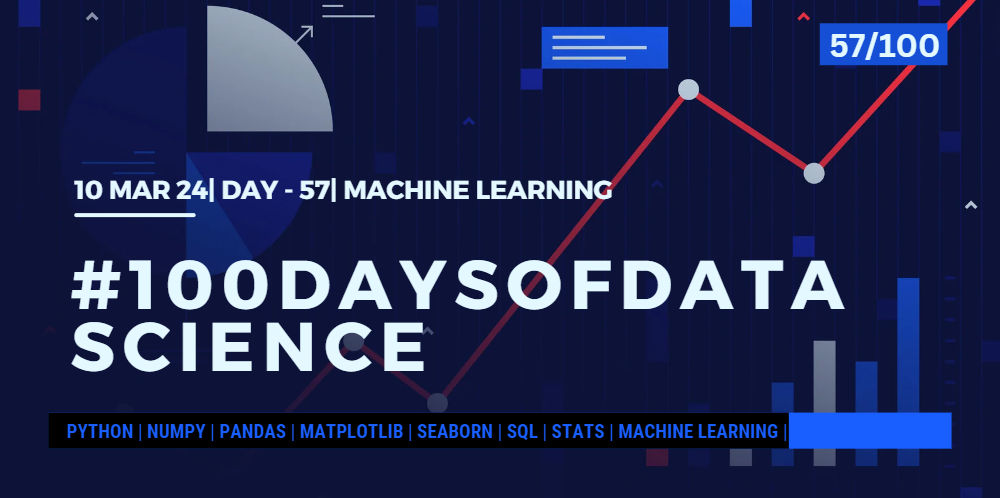

# <center>Naive Bayes<center><hr style="border:4.5px solid #108999"></hr>
    
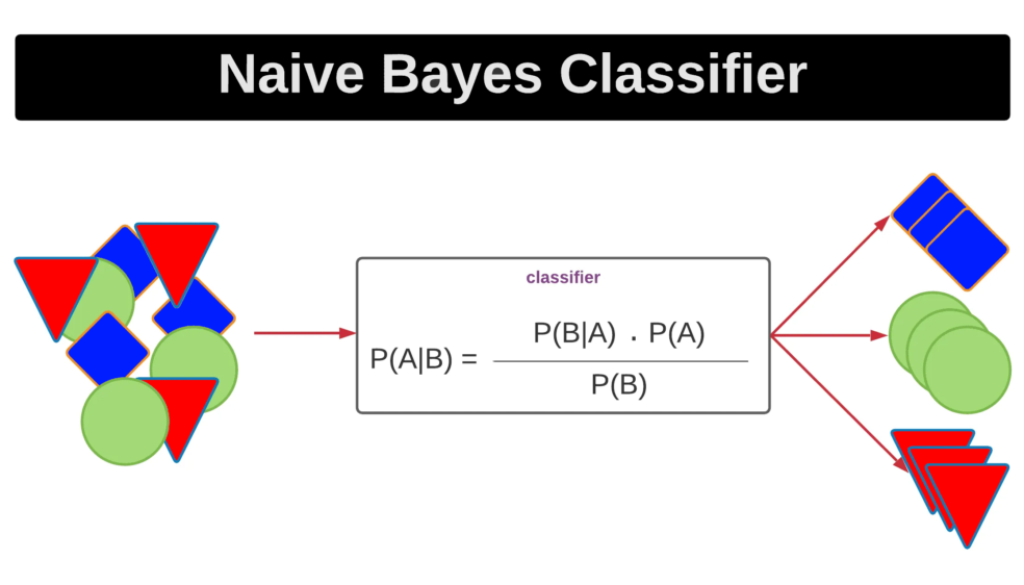 
    
* Naive Bayes is a classification algorithm for binary (two-class) and multi-class classification problems. 
* The technique is easiest to understand when described using binary or categorical input values.
* It is called naive Bayes or idiot Bayes because the calculation of the probabilities for each hypothesis are simplified to make their calculation tractable. Rather than attempting to calculate the values of each attribute value P(d1, d2, d3|h), they are assumed to be conditionally independent given the target value and calculated as P(d1|h) * P(d2|H) and so on.
* This is a very strong assumption that is most unlikely in real data, i.e. that the attributes do not interact. Nevertheless, the approach performs surprisingly well on data where this assumption does not hold.
* Naive Bayes is a family of classification algorithms based on Bayes' theorem. There are several variants within this family, each suited for different data types:
    1. <b>Gaussian Naive Bayes:</b> This is the most common type and assumes features follow a normal distribution (bell-shaped curve). It's efficient for continuous numerical data.
    2. <b>Multinomial Naive Bayes:</b> This variant is ideal for discrete data where features represent counts or frequencies. It's often used for text classification tasks where features might be word occurrences in a document.
    3. <b>Bernoulli Naive Bayes:</b> This is suitable for binary data where features have only two possible values (e.g., True/False, 1/0). It can be helpful for tasks involving presence or absence of certain characteristics.
    4. <b>Complement Naive Bayes:</b> This is a variation of Multinomial Naive Bayes that utilizes the complement of each class for calculations. It can be beneficial for imbalanced datasets where one class has significantly fewer data points compared to others.
* <b>Advantages</b>
    - <b>Simplicity and Efficiency:</b> Naive Bayes is a straightforward algorithm with low computational complexity. It's easy to understand, implement, and train, making it a great choice for beginners.
    - <b>High-Dimensional Data Friendly:</b> Naive Bayes works well with high-dimensional datasets, where the number of features is large.
    - <b>Effective for Certain Tasks: </b> Naive Bayes excels in tasks like spam filtering and text classification, where the assumption of feature independence often holds true.
    - <b>Requires Less Data:</b> Compared to some algorithms, Naive Bayes can achieve good results even with smaller datasets.

* <b>Disadvantages</b>
    - <b>Conditional Independence Assumption:</b> The core assumption is that features are independent, which may not always be true in real-world data. This can lead to inaccurate predictions if features are interrelated.
    - <b>Zero Probability Problem:</b> When encountering a new data point with a feature value not seen in the training data, Naive Bayes might assign a zero probability, hindering its ability to make predictions.
    - <b>Limited Interpretability:</b> While the overall model is interpretable, understanding the impact of individual features can be challenging due to the independence assumption.

In [1]:
### Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
### Import the Dataset
df = pd.read_csv(r'C:\Users\hp\Desktop\100DaysOfDataScience\Day 57\Iris.csv',header=0)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape ### Checking Shape

(150, 6)

In [4]:
df.describe() ### Get information of the Dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.columns ### Checking Columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
df.info() ### Checking Information About a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.isnull().sum() ### Checking Null Values in the Data

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
### Droping columns
df.drop(columns="Id",inplace=True)

In [9]:
df1 = pd.DataFrame.copy(df)
df1.shape

(150, 5)

In [10]:
for i in df1.columns:
    print({i:df1[i].unique()}) ### Checking Unique values in each columns

{'SepalLengthCm': array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])}
{'SepalWidthCm': array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4. , 4.4, 3.8, 3.3,
       4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])}
{'PetalLengthCm': array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, 4.7, 4.5, 4.9, 4. ,
       4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8, 3.7,
       5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 6.1, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.4, 5.4, 5.2])}
{'PetalWidthCm': array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])}
{'Species': array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)}


In [11]:
### Finding numerical variables
colname_num = [var for var in df1.columns if df1[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(colname_num)))
print('The numerical variables are :', colname_num)

There are 4 numerical variables

The numerical variables are : ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [12]:
### Finding categorical variables
colname_cat = [var for var in df1.columns if df1[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(colname_cat)))
print('The categorical variables are :', colname_cat)

There are 1 categorical variables

The categorical variables are : ['Species']


In [13]:
df2 = df1.copy()
df2.shape

(150, 5)

In [14]:
for i in colname_num:
    print("Column Names: ", i)
    print("Null Values: ", df2[i].isna().sum())
    print("Mean Values: ",df2[i].mean())
    print("Median Values: ",df2[i].median())
    print("Mode Values: ",df2[i].mode())
    print('-' * 50)

Column Names:  SepalLengthCm
Null Values:  0
Mean Values:  5.843333333333334
Median Values:  5.8
Mode Values:  0    5.0
Name: SepalLengthCm, dtype: float64
--------------------------------------------------
Column Names:  SepalWidthCm
Null Values:  0
Mean Values:  3.0540000000000003
Median Values:  3.0
Mode Values:  0    3.0
Name: SepalWidthCm, dtype: float64
--------------------------------------------------
Column Names:  PetalLengthCm
Null Values:  0
Mean Values:  3.758666666666666
Median Values:  4.35
Mode Values:  0    1.5
Name: PetalLengthCm, dtype: float64
--------------------------------------------------
Column Names:  PetalWidthCm
Null Values:  0
Mean Values:  1.1986666666666668
Median Values:  1.3
Mode Values:  0    0.2
Name: PetalWidthCm, dtype: float64
--------------------------------------------------


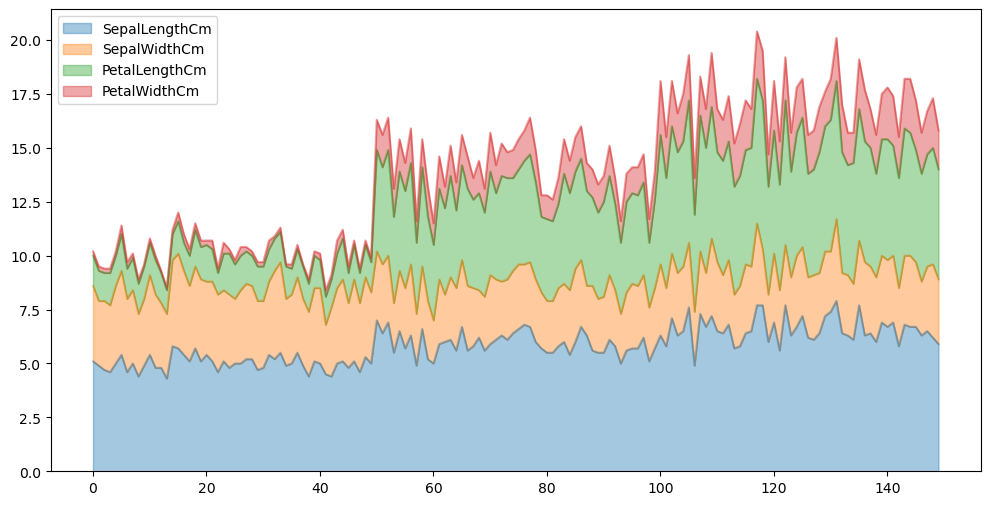

In [17]:
df2.plot.area(y=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],alpha=0.4,figsize=(12, 6));

<Figure size 1000x1000 with 0 Axes>

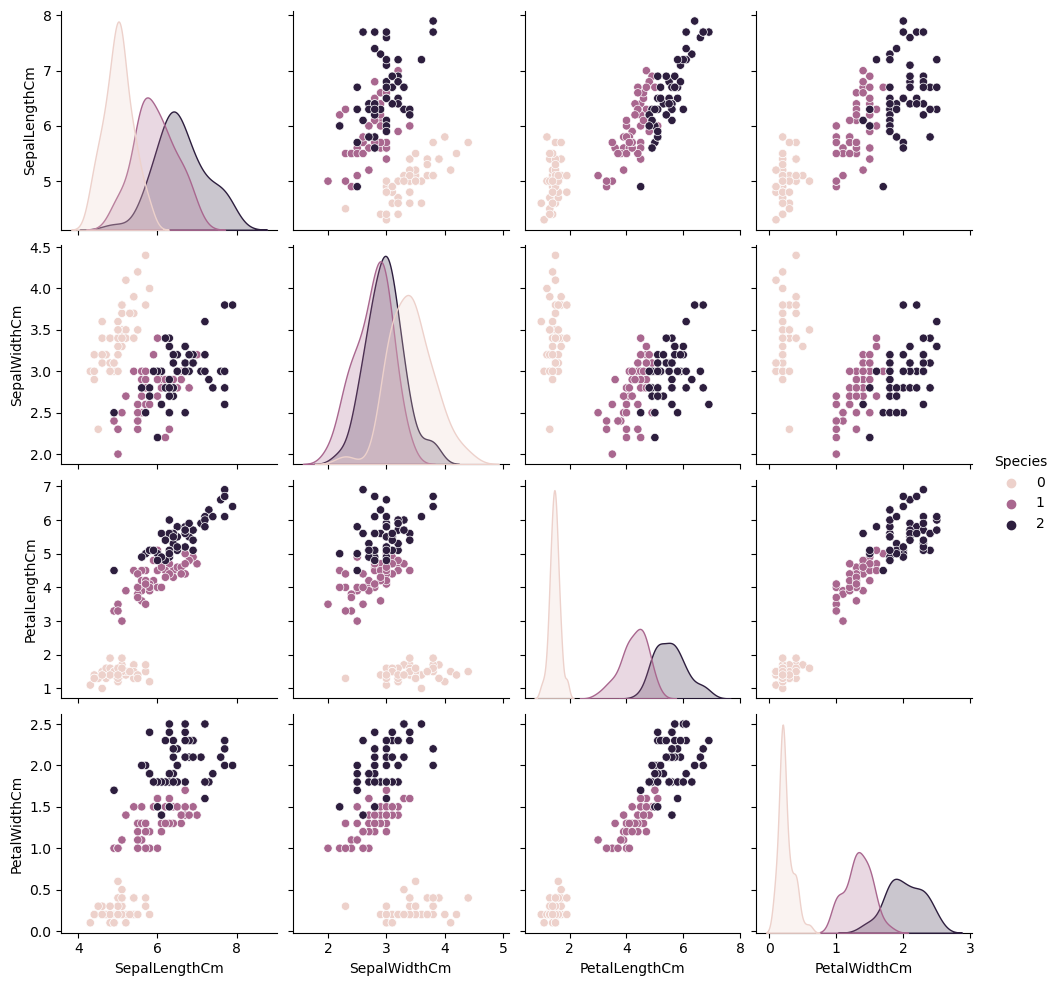

In [47]:
plt.figure(figsize=(10,10))
sns.pairplot(df2,hue="Species")
plt.show()

In [19]:
### Converting all categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for x in colname_cat:
    df2[x]=le.fit_transform(df2[x])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print("Feature",x)
    print("Mapping", le_name_mapping)

Feature Species
Mapping {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


In [20]:
df2.head(15)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [21]:
for col in df2.columns:
    print(f"{col} has {df2[col].nunique()} categories\n")

SepalLengthCm has 35 categories

SepalWidthCm has 23 categories

PetalLengthCm has 43 categories

PetalWidthCm has 22 categories

Species has 3 categories



In [22]:
df3 = df2.copy()
df3.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [23]:
### Spliting Data into X and y
X = df3.values[:,0:4]
y = df3.values[:,4]
print('X:',X.shape)
print('*' * 13)
print('y:',y.shape)

X: (150, 4)
*************
y: (150,)


In [50]:
### Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
#x = scaler.fit_transform(x)
X[:15]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673],
       [-0.53717756,  1.95766909, -1.17067529, -1.05003079],
       [-1.50652052,  0.80065426, -1.3412724 , -1.18150376],
       [-1.02184904,  0.80065426, -1.2844067 , -1.31297673],
       [-1.74885626, -0.35636057, -1.3412724 , -1.31297673],
       [-1.14301691,  0.10644536, -1.2844067 , -1.4444497 ],
       [-0.53717756,  1.49486315, -1.2844067 , -1.31297673],
       [-1.26418478,  0.80065426, -1.227541  , -1.31297673],
       [-1.26418478, -0.1249576 , -1.3412724 , -1.4444497 ],
       [-1.87002413, -0.1249576 , -1.51186952, -1.4444497 ],
       [-0.05250608,  2.18907205, -1.45500381, -1.31297673]])

In [25]:
y = y.astype(int) ### convert y in to integer always perform this operation

In [42]:
### Spliting into Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (105, 4)
X_test:  (45, 4)
y_train:  (105,)
y_test:  (45,)


In [43]:
#import model
from sklearn.naive_bayes import GaussianNB
#create a model object
model_gnb = GaussianNB()
#train the model object
model_gnb.fit(X_train,y_train)
#predict using the model
y_pred = model_gnb.predict(X_test)
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


In [44]:
# Checking confusion matrix for the model
cfm = confusion_matrix(y_test,y_pred)
dff = pd.DataFrame(cfm)
dff.style.set_properties(**{"background-color": "#F3FFFF","color":"black","border": "2px  solid black"})

,0,1,2
0,19,0,0
1,0,12,1
2,0,0,13


In [45]:
# Checking classification report score for the model
cr = classification_report(y_test,y_pred)
print("Classification report: ")
print(cr)

# Checking accuracy score for the model
acc = accuracy_score(y_test,y_pred)
print("Accuracy of the model: ",acc)

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

Accuracy of the model:  0.9777777777777777


##### <center> Made with ❤️ by Zahid Salim Shaikh</center>